# Part 1 Real estate prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns = ['ID', 'Price', 'Date_of_transfer', 'Postcode','Property_type', 'old_new', 'duration','PAON','SAON','street','locality',
           'town','district', 'country','PPD_category', 'Record_status']

In [3]:
houses = pd.read_csv('houses.csv', header = None, names = columns)

In [4]:
houses.head()

,ID,Price,Date_of_transfer,Postcode,Property_type,old_new,duration,PAON,SAON,street,locality,town,district,country,PPD_category,Record_status
0,{02A6460F-C1F3-4977-B7ED-2A77C79302AE},52000,2001-12-07 00:00,DE6 1BL,S,N,F,1A,NaN,OLD HILL,ASHBOURNE,ASHBOURNE,DERBYSHIRE DALES,DERBYSHIRE,A,A
1,{5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4},57000,2003-09-12 00:00,B36 0RA,T,N,F,44,NaN,GREENFINCH ROAD,BIRMINGHAM,BIRMINGHAM,SOLIHULL,WEST MIDLANDS,A,A
2,{09975216-3588-418C-B6C5-A5704B0E77DE},69500,2005-12-21 00:00,OL16 2XR,T,N,L,143,NaN,BELFIELD ROAD,ROCHDALE,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A
3,{44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E},84000,2001-01-31 00:00,SN1 4LJ,T,N,F,34,NaN,KINGSHILL ROAD,SWINDON,SWINDON,SWINDON,SWINDON,A,A
4,{74828706-CBFC-406D-B7B6-394B5863E22E},110000,1998-02-27 00:00,OX3 8AJ,S,N,F,62,NaN,WHARTON ROAD,HEADINGTON,OXFORD,OXFORD,OXFORDSHIRE,A,A


In [5]:
houses.loc[:,'Price'].describe()

count    1.000000e+05
mean     1.743868e+05
std      3.514634e+05
min      1.500000e+02
25%      7.400000e+04
50%      1.290000e+05
75%      2.070000e+05
max      4.846572e+07
Name: Price, dtype: float64

In [6]:
price = houses['Price']

* Since some values for price column were very large on scale of e-07 and were acting as outliers hence the graph was looking ugly. Now if we take log of the prices, it will shrink to a smaller range.

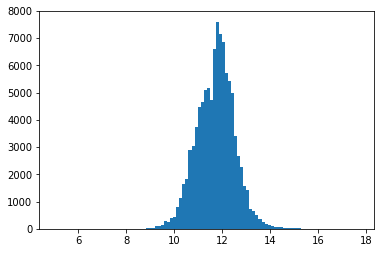

In [7]:
plt.hist(np.log(houses['Price']), bins=100)
plt.show()

In [8]:
inside_london = houses.iloc[:,13].str.contains('LONDON')

In [9]:
inside_london_prices = houses.loc[inside_london, 'Price']

In [10]:
outside_london = ~houses.iloc[:,13].str.contains('LONDON')

In [11]:
outside_london_prices = houses.loc[outside_london, 'Price']

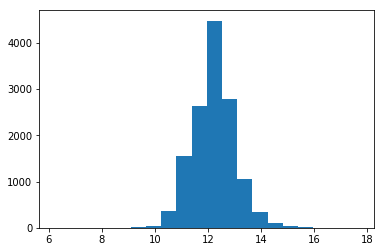

In [12]:
plt.hist(np.log(inside_london_prices), bins=20) 
plt.show()

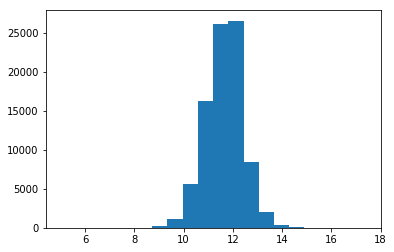

In [13]:
plt.hist(np.log(outside_london_prices), bins=20)
plt.show()

In [14]:
houses['Date_of_transfer'] = pd.to_datetime(houses['Date_of_transfer'])

In [15]:
houses.dtypes

ID                          object
Price                        int64
Date_of_transfer    datetime64[ns]
Postcode                    object
Property_type               object
old_new                     object
duration                    object
PAON                        object
SAON                        object
street                      object
locality                    object
town                        object
district                    object
country                     object
PPD_category                object
Record_status               object
dtype: object

In [16]:
houses['year'] = houses['Date_of_transfer'].dt.year

In [17]:
houses.head()

,ID,Price,Date_of_transfer,Postcode,Property_type,old_new,duration,PAON,SAON,street,locality,town,district,country,PPD_category,Record_status,year
0,{02A6460F-C1F3-4977-B7ED-2A77C79302AE},52000,2001-12-07,DE6 1BL,S,N,F,1A,NaN,OLD HILL,ASHBOURNE,ASHBOURNE,DERBYSHIRE DALES,DERBYSHIRE,A,A,2001
1,{5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4},57000,2003-09-12,B36 0RA,T,N,F,44,NaN,GREENFINCH ROAD,BIRMINGHAM,BIRMINGHAM,SOLIHULL,WEST MIDLANDS,A,A,2003
2,{09975216-3588-418C-B6C5-A5704B0E77DE},69500,2005-12-21,OL16 2XR,T,N,L,143,NaN,BELFIELD ROAD,ROCHDALE,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A,2005
3,{44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E},84000,2001-01-31,SN1 4LJ,T,N,F,34,NaN,KINGSHILL ROAD,SWINDON,SWINDON,SWINDON,SWINDON,A,A,2001
4,{74828706-CBFC-406D-B7B6-394B5863E22E},110000,1998-02-27,OX3 8AJ,S,N,F,62,NaN,WHARTON ROAD,HEADINGTON,OXFORD,OXFORD,OXFORDSHIRE,A,A,1998


In [18]:
temp = houses['Price'].groupby(houses['year']).mean()

<BarContainer object of 22 artists>

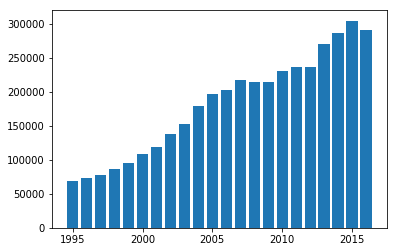

In [19]:
x = temp.index
y = temp.values
plt.bar(x,y)

# Part 2 Generating random numbers

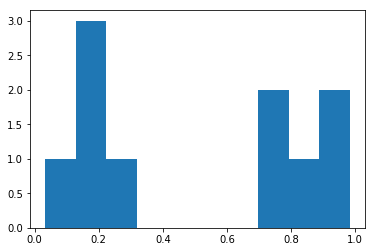

In [20]:
a = np.random.rand(10)
plt.hist(a, bins = 10)
plt.show()

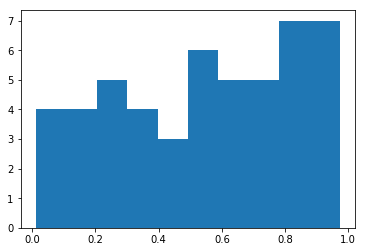

In [21]:
b = np.random.rand(50)
plt.hist(b, bins = 10)
plt.show()

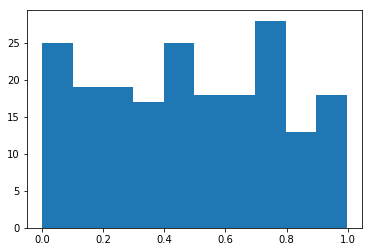

In [22]:
c = np.random.rand(200)
plt.hist(c, bins = 10)
plt.show()

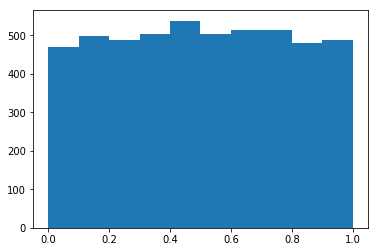

In [23]:
d = np.random.rand(5000)
plt.hist(d, bins = 10)
plt.show()

* With the increase in the number of random points, histogram tends to follow uniform distribution 


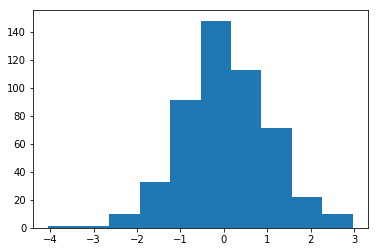

In [24]:
e = np.random.randn(500)
plt.hist(e, bins = 10)
plt.show()

* randn generates numbers which follows normal distribution